# ***MODULE 1 — BIG DATA FUNDAMENTALS***

**STEP 0 — Setup (Install Libraries & Mount Drive if Needed)**

In [ ]:
!pip install dask pyspark seaborn --quiet
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns


**STEP 1 — Load Your Dataset (Pandas)**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Airline Dataset.csv')
df.head()


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


**STEP 2 — Check Dataset Size & Memory Usage**

In [ ]:
df.info()
df.memory_usage(deep=True).sum() / (1024*1024)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

np.float64(71.51348876953125)

**STEP 3 — Convert to Dask DataFrame for Big Data Processing**

In [ ]:
ddf = dd.from_pandas(df, npartitions=4)
ddf


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
npartitions=4,,,,,,,,,,,,,,,
0,int64,string,string,string,int64,string,string,string,string,string,string,string,string,string,string
24655,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49310,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73965,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98618,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**STEP 4 — Basic EDA (Pandas + Dask)**

**`Pandas Stats`**

In [ ]:
df.describe()
df.isnull().sum()


,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


**`Dask Stats (Parallel Processing)`**

In [ ]:
ddf = dd.from_pandas(df, npartitions=2)
ddf.describe().compute()
ddf.isnull().sum().compute()

,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


**STEP 5 — Value Counts (Pandas vs Dask Comparison)**

In [ ]:
df['Gender'].value_counts()     # Pandas
ddf['Gender'].value_counts().compute()   # Dask


,count
Gender,
Female,49021
Male,49598


**STEP 6 — Visualizations (matplotlib + seaborn)**

**`Distribution Plot`**

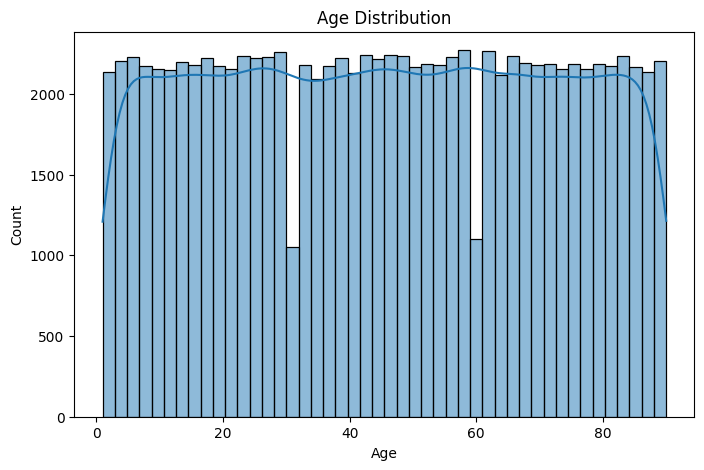

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


**`Bar Plot`**

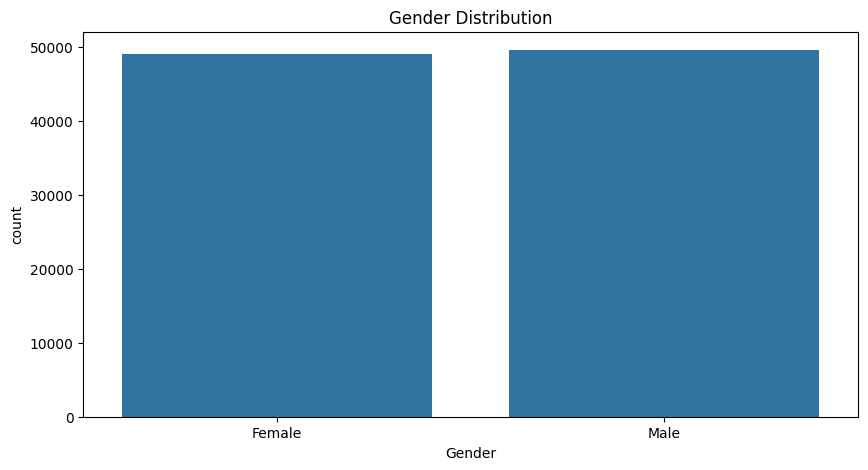

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


# ***MODULE 2 — PYSPARK FOR BIG DATA PROCESSING***

**STEP 1 — Install PySpark & Start Session**

In [ ]:
!pip install pyspark --quiet

In [ ]:
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] += ":/usr/lib/jvm/java-8-openjdk-amd64/bin"


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package java-common.
(Reading database ... 121235 files and directories currently installed.)
Preparing to unpack .../0-java-common_0.72build2_all.deb ...
Unpacking java-common (0.72build2) ...
Selecting previously unselected package libpcsclite1:amd64.
Preparing to unpack .../1-libpcsclite1_1.9.5-3ubuntu1_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.9.5-3ubuntu1) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../2-libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../3-openjdk-8-jre-headless_8u462-ga~us1-0ubuntu2~22.04.2_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u462-ga~us1-0ubuntu2~22.04.2) ...

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("AirlineDataset") \
    .getOrCreate()

spark


**STEP 2 — Load Dataset into Spark DataFrame**

In [ ]:
spark_df = spark.read.csv('/content/drive/MyDrive/Airline Dataset.csv', header=True, inferSchema=True)
spark_df.show(5)
spark_df.printSchema()


+------------+----------+---------+------+---+-----------+--------------------+--------------------+-------------+-----------------+-------------+--------------+---------------+-------------+-------------+
|Passenger ID|First Name|Last Name|Gender|Age|Nationality|        Airport Name|Airport Country Code| Country Name|Airport Continent|   Continents|Departure Date|Arrival Airport|   Pilot Name|Flight Status|
+------------+----------+---------+------+---+-----------+--------------------+--------------------+-------------+-----------------+-------------+--------------+---------------+-------------+-------------+
|       10856|    Edithe|   Leggis|Female| 62|      Japan|    Coldfoot Airport|                  US|United States|              NAM|North America|     6/28/2022|            CXF|Edithe Leggis|      On Time|
|       43872|    Elwood|     Catt|  Male| 62|  Nicaragua|   Kugluktuk Airport|                  CA|       Canada|              NAM|North America|    12/26/2022|            YCO

**STEP 3 — Select, Filter, Aggregate (Spark DataFrame API)**

**`Select Columns`**

In [ ]:
spark_df.select("Gender", "Age").show(5)

+------+---+
|Gender|Age|
+------+---+
|Female| 62|
|  Male| 62|
|  Male| 67|
|Female| 71|
|  Male| 21|
+------+---+
only showing top 5 rows



**`Filter Example`**

In [ ]:
spark_df.filter(spark_df["Age"] > 50).show(5)


+------------+----------+---------+------+---+-----------+--------------------+--------------------+-------------+-----------------+-------------+--------------+---------------+-------------+-------------+
|Passenger ID|First Name|Last Name|Gender|Age|Nationality|        Airport Name|Airport Country Code| Country Name|Airport Continent|   Continents|Departure Date|Arrival Airport|   Pilot Name|Flight Status|
+------------+----------+---------+------+---+-----------+--------------------+--------------------+-------------+-----------------+-------------+--------------+---------------+-------------+-------------+
|       10856|    Edithe|   Leggis|Female| 62|      Japan|    Coldfoot Airport|                  US|United States|              NAM|North America|     6/28/2022|            CXF|Edithe Leggis|      On Time|
|       43872|    Elwood|     Catt|  Male| 62|  Nicaragua|   Kugluktuk Airport|                  CA|       Canada|              NAM|North America|    12/26/2022|            YCO

**`Group By + Aggregation`**

In [ ]:
spark_df.groupBy("Gender").count().show()


+------+-----+
|Gender|count|
+------+-----+
|Female|49021|
|  Male|49598|
+------+-----+



**STEP 4 — RDD Operations**

**`Create RDD from DataFrame`**

In [ ]:
rdd = spark_df.rdd
rdd.take(5)


[Row(Passenger ID=10856, First Name='Edithe', Last Name='Leggis', Gender='Female', Age=62, Nationality='Japan', Airport Name='Coldfoot Airport', Airport Country Code='US', Country Name='United States', Airport Continent='NAM', Continents='North America', Departure Date='6/28/2022', Arrival Airport='CXF', Pilot Name='Edithe Leggis', Flight Status='On Time'),
 Row(Passenger ID=43872, First Name='Elwood', Last Name='Catt', Gender='Male', Age=62, Nationality='Nicaragua', Airport Name='Kugluktuk Airport', Airport Country Code='CA', Country Name='Canada', Airport Continent='NAM', Continents='North America', Departure Date='12/26/2022', Arrival Airport='YCO', Pilot Name='Elwood Catt', Flight Status='On Time'),
 Row(Passenger ID=42633, First Name='Darby', Last Name='Felgate', Gender='Male', Age=67, Nationality='Russia', Airport Name='Grenoble-Isère Airport', Airport Country Code='FR', Country Name='France', Airport Continent='EU', Continents='Europe', Departure Date='1/18/2022', Arrival Airpor

**`RDD Transformations`**

In [ ]:
ages = rdd.map(lambda row: row["Age"])
ages.take(10)


[62, 62, 67, 71, 21, 55, 73, 36, 35, 13]

**`Filter Example`**

In [ ]:
adult = ages.filter(lambda x: x >= 18)
adult.take(10)


[62, 62, 67, 71, 21, 55, 73, 36, 35, 39]

**`Key-Value Pair Example`**

In [ ]:
kv = spark_df.rdd.map(lambda row: (row["Gender"], 1))
kv.reduceByKey(lambda a, b: a + b).collect()


[('Female', 49021), ('Male', 49598)]

**STEP 5 — SQL Operations**

**`Register as View`**

In [ ]:
spark_df.createOrReplaceTempView("airline")


**`Run SQL Query`**

In [ ]:
spark.sql("SELECT Gender, COUNT(*) AS total FROM airline GROUP BY Gender").show()


+------+-----+
|Gender|total|
+------+-----+
|Female|49021|
|  Male|49598|
+------+-----+



**`Complex SQL Example`**

In [ ]:
spark.sql("""
SELECT Gender, AVG(Age) AS avg_age
FROM airline
GROUP BY Gender
""").show()

+------+------------------+
|Gender|           avg_age|
+------+------------------+
|Female| 45.51943044817527|
|  Male|45.488789870559295|
+------+------------------+



# **1. RDD TRANSFORMATIONS**

In [ ]:
rdd = spark_df.rdd # Re-initialize rdd to ensure it contains Row objects

**`1. map() → Age × 2`**

In [ ]:
age_multiplied = rdd.map(lambda row: row["Age"] * 2 if row["Age"] is not None else None)
age_multiplied.take(10)

[124, 124, 134, 142, 42, 110, 146, 72, 70, 26]

**`2. filter() → Passengers older than 60`**

In [ ]:
older_than_60 = rdd.filter(lambda row: row["Age"] is not None and row["Age"] > 60)
older_than_60.take(10)

[Row(Passenger ID=10856, First Name='Edithe', Last Name='Leggis', Gender='Female', Age=62, Nationality='Japan', Airport Name='Coldfoot Airport', Airport Country Code='US', Country Name='United States', Airport Continent='NAM', Continents='North America', Departure Date='6/28/2022', Arrival Airport='CXF', Pilot Name='Edithe Leggis', Flight Status='On Time'),
 Row(Passenger ID=43872, First Name='Elwood', Last Name='Catt', Gender='Male', Age=62, Nationality='Nicaragua', Airport Name='Kugluktuk Airport', Airport Country Code='CA', Country Name='Canada', Airport Continent='NAM', Continents='North America', Departure Date='12/26/2022', Arrival Airport='YCO', Pilot Name='Elwood Catt', Flight Status='On Time'),
 Row(Passenger ID=42633, First Name='Darby', Last Name='Felgate', Gender='Male', Age=67, Nationality='Russia', Airport Name='Grenoble-Isère Airport', Airport Country Code='FR', Country Name='France', Airport Continent='EU', Continents='Europe', Departure Date='1/18/2022', Arrival Airpor

**`3. flatMap() → Split Type of Travel`**

In [ ]:
travel_words = rdd.flatMap(
    lambda row: row["Continents"].split() if row["Continents"] else []
)
travel_words.take(10)

['North',
 'America',
 'North',
 'America',
 'Europe',
 'North',
 'America',
 'North',
 'America',
 'South']

**`4. distinct() → Unique Class types`**

In [ ]:
unique_classes = rdd.map(lambda row: row["Flight Status"]).distinct()
unique_classes.take(10)

['Delayed', 'Cancelled', 'On Time']

**`5. union(), subtract(), intersection() using Gender`**

In [ ]:
male = rdd.filter(lambda row: row["Gender"] == "Male")
female = rdd.filter(lambda row: row["Gender"] == "Female")
male_female_union = male.union(female).take(10)
male_not_female = male.subtract(female).take(10) # Subtract can only be performed on RDDs with the same schema.
male_female_intersection = male.intersection(female).take(10)

# **2. RDD ACTIONS (SAFE)**

**`count()`**

In [ ]:
rdd.count()


98619

**`take() — First 5 rows`**

In [ ]:
rdd.take(5)


[Row(Passenger ID=10856, First Name='Edithe', Last Name='Leggis', Gender='Female', Age=62, Nationality='Japan', Airport Name='Coldfoot Airport', Airport Country Code='US', Country Name='United States', Airport Continent='NAM', Continents='North America', Departure Date='6/28/2022', Arrival Airport='CXF', Pilot Name='Edithe Leggis', Flight Status='On Time'),
 Row(Passenger ID=43872, First Name='Elwood', Last Name='Catt', Gender='Male', Age=62, Nationality='Nicaragua', Airport Name='Kugluktuk Airport', Airport Country Code='CA', Country Name='Canada', Airport Continent='NAM', Continents='North America', Departure Date='12/26/2022', Arrival Airport='YCO', Pilot Name='Elwood Catt', Flight Status='On Time'),
 Row(Passenger ID=42633, First Name='Darby', Last Name='Felgate', Gender='Male', Age=67, Nationality='Russia', Airport Name='Grenoble-Isère Airport', Airport Country Code='FR', Country Name='France', Airport Continent='EU', Continents='Europe', Departure Date='1/18/2022', Arrival Airpor

**`reduce() → Total flight distance`**

In [ ]:
total_age = rdd.map(
    lambda row: row["Age"] if row["Age"] is not None else 0
).reduce(lambda x, y: x + y)

total_age

4487561

# **3. KEY–VALUE RDD OPERATIONS**

**`1. reduceByKey() → Count by Gender`**

In [ ]:
gender_count = rdd.map(lambda row: (row["Gender"], 1)) \
                  .reduceByKey(lambda a,b: a+b) \
                  .take(10)

gender_count


[('Female', 49021), ('Male', 49598)]

**`2. groupByKey() → Ages grouped by Customer Type`**

In [ ]:
ages_by_customer = rdd.map(lambda row: (row["Continents"], row["Age"])) \
                      .groupByKey() \
                      .mapValues(list)

ages_by_customer.take(5)

[('Europe',
  [67,
   73,
   35,
   73,
   26,
   70,
   23,
   7,
   27,
   76,
   56,
   38,
   35,
   45,
   70,
   45,
   76,
   88,
   39,
   12,
   45,
   33,
   69,
   23,
   29,
   61,
   42,
   16,
   49,
   3,
   3,
   42,
   61,
   42,
   11,
   86,
   39,
   66,
   89,
   81,
   82,
   84,
   52,
   42,
   3,
   16,
   79,
   31,
   56,
   69,
   11,
   75,
   2,
   5,
   33,
   56,
   36,
   24,
   81,
   39,
   77,
   17,
   65,
   41,
   63,
   29,
   60,
   78,
   79,
   56,
   89,
   40,
   21,
   3,
   41,
   79,
   26,
   13,
   34,
   82,
   4,
   74,
   62,
   21,
   5,
   59,
   15,
   72,
   21,
   12,
   81,
   87,
   46,
   77,
   37,
   72,
   29,
   9,
   57,
   48,
   61,
   41,
   58,
   67,
   69,
   20,
   37,
   12,
   30,
   56,
   51,
   42,
   6,
   28,
   24,
   45,
   46,
   70,
   70,
   56,
   60,
   11,
   79,
   70,
   13,
   18,
   85,
   15,
   10,
   27,
   67,
   24,
   19,
   46,
   87,
   46,
   25,
   6,
   84,
   2,
   58,
   8,
   88,
 

**`3. join() → Gender + Type of Travel`**

In [ ]:
rdd_gender = rdd.map(lambda row: (row["Gender"], row["Nationality"]))
rdd_age = rdd.map(lambda row: (row["Gender"], row["Age"]))

joined = rdd_gender.join(rdd_age).take(10)
joined

[('Female', ('Japan', 62)),
 ('Female', ('Japan', 71)),
 ('Female', ('Japan', 55)),
 ('Female', ('Japan', 35)),
 ('Female', ('Japan', 47)),
 ('Female', ('Japan', 77)),
 ('Female', ('Japan', 32)),
 ('Female', ('Japan', 22)),
 ('Female', ('Japan', 28)),
 ('Female', ('Japan', 87))]

**`4. aggregateByKey() → min/max flight distance per Class`**

In [ ]:
distance_stats = rdd.map(
    lambda row: (row["Flight Status"], row["Age"] if row["Age"] is not None else 0)
).aggregateByKey(
    (999999, -1),
    lambda acc, v: (min(acc[0], v), max(acc[1], v)),
    lambda a, b: (min(a[0], b[0]), max(a[1], b[1]))
)

distance_stats.take(10)

[('Delayed', (1, 90)), ('Cancelled', (1, 90)), ('On Time', (1, 90))]

# **4. DATAFRAME OPERATIONS (Dataset-based)**

**`Select`**

In [ ]:
spark_df.select("Gender", "Age").show(10)

+------+---+
|Gender|Age|
+------+---+
|Female| 62|
|  Male| 62|
|  Male| 67|
|Female| 71|
|  Male| 21|
|Female| 55|
|  Male| 73|
|  Male| 36|
|Female| 35|
|  Male| 13|
+------+---+
only showing top 10 rows



**`Filter`**

In [ ]:
spark_df.filter(spark_df.Age > 60).select("Gender","Age", "Flight Status").show(10)

+------+---+-------------+
|Gender|Age|Flight Status|
+------+---+-------------+
|Female| 62|      On Time|
|  Male| 62|      On Time|
|  Male| 67|      On Time|
|Female| 71|      Delayed|
|  Male| 73|    Cancelled|
|  Male| 71|      Delayed|
|Female| 77|      Delayed|
|Female| 87|    Cancelled|
|  Male| 62|    Cancelled|
|  Male| 87|    Cancelled|
+------+---+-------------+
only showing top 10 rows



**`Aggregation — Avg Age per Travel Type`**

In [ ]:
spark_df.groupBy("Continents").avg("Age").show()

+-------------+------------------+
|   Continents|          avg(Age)|
+-------------+------------------+
|       Europe| 45.22059181191731|
|       Africa| 45.63599274705349|
|North America| 45.58161895545219|
|South America|45.373203955961934|
|      Oceania| 45.37162844367518|
|         Asia| 45.65386059988195|
+-------------+------------------+



**`Aggregation — Count per Gender`**

In [ ]:
spark_df.groupBy("Gender").count().show()

+------+-----+
|Gender|count|
+------+-----+
|Female|49021|
|  Male|49598|
+------+-----+



# **5. SQL OPERATIONS (Dataset-based)**

**`1. Total passengers by Gender`**

In [ ]:
spark.sql("""
SELECT Gender, COUNT(*) AS total
FROM airline
GROUP BY Gender
""").show()

+------+-----+
|Gender|total|
+------+-----+
|Female|49021|
|  Male|49598|
+------+-----+



**`2. Senior passengers (Age > 60)`**

In [ ]:
spark.sql("""
SELECT Gender, Age
FROM airline
WHERE Age > 60
""").show()

+------+---+
|Gender|Age|
+------+---+
|Female| 62|
|  Male| 62|
|  Male| 67|
|Female| 71|
|  Male| 73|
|  Male| 71|
|Female| 77|
|Female| 87|
|  Male| 62|
|  Male| 87|
|  Male| 74|
|Female| 73|
|  Male| 61|
|  Male| 62|
|  Male| 85|
|  Male| 62|
|Female| 83|
|Female| 76|
|Female| 77|
|  Male| 77|
+------+---+
only showing top 20 rows



**`3. Average flight distance by Class`**

In [ ]:
spark.sql("""
SELECT `Flight Status`, AVG(Age) AS avg_age
FROM airline
GROUP BY `Flight Status`
""").show()

+-------------+-----------------+
|Flight Status|          avg_age|
+-------------+-----------------+
|      On Time|45.46422699872131|
|    Cancelled|45.46439196162953|
|      Delayed|45.58359477323262|
+-------------+-----------------+



# **1. CACHING & PERSISTENCE**

**`Cache DataFrame`**

In [ ]:
cached = spark_df.cache()
cached.count()   # materialize


98619

**`Unpersist`**

In [ ]:
cached.unpersist()


DataFrame[Passenger ID: int, First Name: string, Last Name: string, Gender: string, Age: int, Nationality: string, Airport Name: string, Airport Country Code: string, Country Name: string, Airport Continent: string, Continents: string, Departure Date: string, Arrival Airport: string, Pilot Name: string, Flight Status: string]

**`Performance Test (With vs Without Cache)`**

In [ ]:
import time

# WITHOUT CACHE
t1 = time.time()
spark_df.groupBy("Gender").count().collect()
t2 = time.time()
print("No Cache Time:", round(t2 - t1, 4), "sec")

# WITH CACHE
cached = spark_df.cache()
cached.count()   # materialize

t3 = time.time()
cached.groupBy("Gender").count().collect()
t4 = time.time()
print("With Cache Time:", round(t4 - t3, 4), "sec")


No Cache Time: 0.6606 sec
With Cache Time: 0.5651 sec


# **2. PARTITIONING & PARALLELISM**

**`Repartition Airline Dataset`**

In [ ]:
df8 = spark_df.repartition(8)
print("Partitions =", df8.rdd.getNumPartitions())


Partitions = 8


**`Parallel Processing Example`**

In [ ]:
result = df8.rdd.map(lambda row: (row["Gender"], 1)) \
                .reduceByKey(lambda a,b: a+b) \
                .take(10)

result


[('Male', 49598), ('Female', 49021)]

**`Partition Performance`**

In [ ]:
import time

for p in [2, 4, 8, 16]:
    dfp = spark_df.repartition(p)
    start = time.time()
    dfp.groupBy("Gender").count().collect()
    end = time.time()
    print(f"Partitions {p}: {round(end-start,4)} sec")

Partitions 2: 0.6245 sec
Partitions 4: 0.4658 sec
Partitions 8: 0.6547 sec
Partitions 16: 1.0432 sec


# **3. BROADCAST VARIABLES & ACCUMULATORS**

**`Broadcast Variable (Filter Travel Types)`**

In [ ]:
allowed_types = ["On Time", "Delayed", "Cancelled"]
bcast = spark.sparkContext.broadcast(allowed_types)

filtered = spark_df.rdd.filter(
    lambda row: row["Flight Status"] in bcast.value
)

filtered.take(10)

[Row(Passenger ID=10856, First Name='Edithe', Last Name='Leggis', Gender='Female', Age=62, Nationality='Japan', Airport Name='Coldfoot Airport', Airport Country Code='US', Country Name='United States', Airport Continent='NAM', Continents='North America', Departure Date='6/28/2022', Arrival Airport='CXF', Pilot Name='Edithe Leggis', Flight Status='On Time'),
 Row(Passenger ID=43872, First Name='Elwood', Last Name='Catt', Gender='Male', Age=62, Nationality='Nicaragua', Airport Name='Kugluktuk Airport', Airport Country Code='CA', Country Name='Canada', Airport Continent='NAM', Continents='North America', Departure Date='12/26/2022', Arrival Airport='YCO', Pilot Name='Elwood Catt', Flight Status='On Time'),
 Row(Passenger ID=42633, First Name='Darby', Last Name='Felgate', Gender='Male', Age=67, Nationality='Russia', Airport Name='Grenoble-Isère Airport', Airport Country Code='FR', Country Name='France', Airport Continent='EU', Continents='Europe', Departure Date='1/18/2022', Arrival Airpor

**`Accumulator — Count Null Ages`**

In [ ]:
null_age_acc = spark.sparkContext.accumulator(0)

def find_null_age(row):
    global null_age_acc
    if row["Age"] is None:
        null_age_acc += 1

rdd.foreach(find_null_age)

print("Null Age Count =", null_age_acc)


Null Age Count = 0


# **4. PERFORMANCE TUNING**

**`Compare Cache vs Persist Levels`**

In [ ]:
import time

# MEMORY_ONLY (cache)
df_cache = spark_df.cache()
df_cache.count()
start = time.time()
df_cache.groupBy("Flight Status").count().collect()
print("cache() Time:", round(time.time()-start,4), "sec")

# MEMORY_AND_DISK
from pyspark.storagelevel import StorageLevel
df_persist = spark_df.persist(StorageLevel.MEMORY_AND_DISK)
df_persist.count()
start = time.time()
df_persist.groupBy("Flight Status").count().collect()
print("MEMORY_AND_DISK Time:", round(time.time()-start,4), "sec")

cache() Time: 0.2301 sec
MEMORY_AND_DISK Time: 0.1812 sec


# **5. BIGQUERY**

**`Authenticate`**

In [ ]:
from google.colab import auth
auth.authenticate_user()


**`Create Client`**

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='your-gcp-project-id')

# **6. RUN SQL QUERIES**

**`Count Rows`**

In [ ]:
%%bigquery --project your-gcp-project-id
SELECT COUNT(*)
FROM `bigquery-public-data.usa_names.usa_1910_2013`;


ERROR:
 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/your-gcp-project-id/jobs?prettyPrint=false: ProjectId must be non-empty

Location: None
Job ID: 7dc08fd1-0283-4eab-9757-bcea116c80fd



**`GROUP BY Top 5 Names`**

In [ ]:
%%bigquery --project your-gcp-project-id
SELECT name, SUM(number) AS total
FROM `bigquery-public-data.usa_names.usa_1910_2013`
GROUP BY name
ORDER BY total DESC
LIMIT 5;


ERROR:
 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/your-gcp-project-id/jobs?prettyPrint=false: ProjectId must be non-empty

Location: None
Job ID: 9c42f42d-7036-4eb7-93a9-422862cbb4ec



**`Filter Example (number > 5000)`**

In [ ]:
%%bigquery --project your-gcp-project-id
SELECT *
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE number > 5000;


ERROR:
 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/your-gcp-project-id/jobs?prettyPrint=false: ProjectId must be non-empty

Location: None
Job ID: cd7af64c-e4ff-4377-ab82-691c0353d837



# **STEP 1 — DATA EXPLORATION**

# **1.1 Create Two Tables From**

**`Table A — Passenger Info`**

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

already_existing_spark_df = spark_df # Renaming for clarity as airline var was already used with this dataframe before.
already_existing_spark_df = already_existing_spark_df.withColumn("id", monotonically_increasing_id())

tableA = already_existing_spark_df.select("id", "Gender", "Age")
tableA.show(5)

+---+------+---+
| id|Gender|Age|
+---+------+---+
|  0|Female| 62|
|  1|  Male| 62|
|  2|  Male| 67|
|  3|Female| 71|
|  4|  Male| 21|
+---+------+---+
only showing top 5 rows



**`Table B — Flight Details`**

In [ ]:
tableB = already_existing_spark_df.select("id", "Continents", "Flight Status", "Age")
tableB.show(5)

+---+-------------+-------------+---+
| id|   Continents|Flight Status|Age|
+---+-------------+-------------+---+
|  0|North America|      On Time| 62|
|  1|North America|      On Time| 62|
|  2|       Europe|      On Time| 67|
|  3|North America|      Delayed| 71|
|  4|North America|      On Time| 21|
+---+-------------+-------------+---+
only showing top 5 rows



# **1.2 PERFORM REAL JOINS ON YOUR DATASET**

**`INNER JOIN (Passengers with matching flight details)`**

In [ ]:
inner_join = tableA.join(tableB, "id", "inner")
inner_join.show(10)

+---+------+---+-------------+-------------+---+
| id|Gender|Age|   Continents|Flight Status|Age|
+---+------+---+-------------+-------------+---+
|  0|Female| 62|North America|      On Time| 62|
|  1|  Male| 62|North America|      On Time| 62|
|  2|  Male| 67|       Europe|      On Time| 67|
|  3|Female| 71|North America|      Delayed| 71|
|  4|  Male| 21|North America|      On Time| 21|
|  5|Female| 55|South America|      On Time| 55|
|  6|  Male| 73|       Europe|    Cancelled| 73|
|  7|  Male| 36|South America|    Cancelled| 36|
|  8|Female| 35|       Europe|      On Time| 35|
|  9|  Male| 13|North America|      On Time| 13|
+---+------+---+-------------+-------------+---+
only showing top 10 rows



**`LEFT JOIN (All passengers, flight details optional)`**

In [ ]:
left_join = tableA.join(tableB, "id", "left")
left_join.show(10)

+---+------+---+-------------+-------------+---+
| id|Gender|Age|   Continents|Flight Status|Age|
+---+------+---+-------------+-------------+---+
|  0|Female| 62|North America|      On Time| 62|
|  1|  Male| 62|North America|      On Time| 62|
|  2|  Male| 67|       Europe|      On Time| 67|
|  3|Female| 71|North America|      Delayed| 71|
|  4|  Male| 21|North America|      On Time| 21|
|  5|Female| 55|South America|      On Time| 55|
|  6|  Male| 73|       Europe|    Cancelled| 73|
|  7|  Male| 36|South America|    Cancelled| 36|
|  8|Female| 35|       Europe|      On Time| 35|
|  9|  Male| 13|North America|      On Time| 13|
+---+------+---+-------------+-------------+---+
only showing top 10 rows



**`RIGHT JOIN (All flights, passenger info optional)`**

In [ ]:
right_join = tableA.join(tableB, "id", "right")
right_join.show(10)

+---+------+---+-------------+-------------+---+
| id|Gender|Age|   Continents|Flight Status|Age|
+---+------+---+-------------+-------------+---+
|  0|Female| 62|North America|      On Time| 62|
|  1|  Male| 62|North America|      On Time| 62|
|  2|  Male| 67|       Europe|      On Time| 67|
|  3|Female| 71|North America|      Delayed| 71|
|  4|  Male| 21|North America|      On Time| 21|
|  5|Female| 55|South America|      On Time| 55|
|  6|  Male| 73|       Europe|    Cancelled| 73|
|  7|  Male| 36|South America|    Cancelled| 36|
|  8|Female| 35|       Europe|      On Time| 35|
|  9|  Male| 13|North America|      On Time| 13|
+---+------+---+-------------+-------------+---+
only showing top 10 rows



**`FULL OUTER JOIN`**

In [ ]:
full_join = tableA.join(tableB, "id", "outer")
full_join.show(10)

+---+------+---+-------------+-------------+---+
| id|Gender|Age|   Continents|Flight Status|Age|
+---+------+---+-------------+-------------+---+
|  0|Female| 62|North America|      On Time| 62|
|  1|  Male| 62|North America|      On Time| 62|
|  5|Female| 55|South America|      On Time| 55|
|  6|  Male| 73|       Europe|    Cancelled| 73|
|  7|  Male| 36|South America|    Cancelled| 36|
|  9|  Male| 13|North America|      On Time| 13|
| 10|  Male| 39|North America|    Cancelled| 39|
| 17|  Male| 12|         Asia|      Delayed| 12|
| 19|  Male| 62|         Asia|    Cancelled| 62|
| 22|Female| 45|       Africa|      On Time| 45|
+---+------+---+-------------+-------------+---+
only showing top 10 rows



# **1.3 AGGREGATIONS**

**`Summary stats by Gender`**

In [ ]:
airline.groupBy("Gender").agg(
    {"Age": "avg"}
).show()

+------+------------------+
|Gender|          avg(Age)|
+------+------------------+
|Female| 45.51943044817527|
|  Male|45.488789870559295|
+------+------------------+



# **1.4 WINDOW FUNCTIONS**

**`ROW_NUMBER()`**

In [ ]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

w = Window.partitionBy("Gender").orderBy(F.desc("Age"))

airline.select(
    "Gender", "Age",
    F.row_number().over(w).alias("RowNum")
).show(10)


+------+---+------+
|Gender|Age|RowNum|
+------+---+------+
|Female| 90|     1|
|Female| 90|     2|
|Female| 90|     3|
|Female| 90|     4|
|Female| 90|     5|
|Female| 90|     6|
|Female| 90|     7|
|Female| 90|     8|
|Female| 90|     9|
|Female| 90|    10|
+------+---+------+
only showing top 10 rows



**`RANK()`**

In [ ]:
airline.select(
    "Gender", "Age",
    F.rank().over(w).alias("RankAge")
).show(10)


+------+---+-------+
|Gender|Age|RankAge|
+------+---+-------+
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
|Female| 90|      1|
+------+---+-------+
only showing top 10 rows



**`LAG()`**

In [ ]:
airline.select(
    "Gender", "Age",
    F.lag("Age", 1).over(w).alias("Prev_Age")
).show(10)


+------+---+--------+
|Gender|Age|Prev_Age|
+------+---+--------+
|Female| 90|    NULL|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
+------+---+--------+
only showing top 10 rows



**`LEAD()`**

In [ ]:
airline.select(
    "Gender", "Age",
    F.lead("Age", 1).over(w).alias("Next_Age")
).show(10)


+------+---+--------+
|Gender|Age|Next_Age|
+------+---+--------+
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
|Female| 90|      90|
+------+---+--------+
only showing top 10 rows



# **1.5 Convert Results to Pandas for Visualization**

In [ ]:
pdf = inner_join.toPandas()
pdf.head()


,id,Gender,Age,Continents,Flight Status,Age
0,0,Female,62,North America,On Time,62
1,1,Male,62,North America,On Time,62
2,2,Male,67,Europe,On Time,67
3,3,Female,71,North America,Delayed,71
4,4,Male,21,North America,On Time,21


# **STEP 2 — DATA VISUALIZATION**

# **2.1 BAR CHART — Age AVG by Gender**

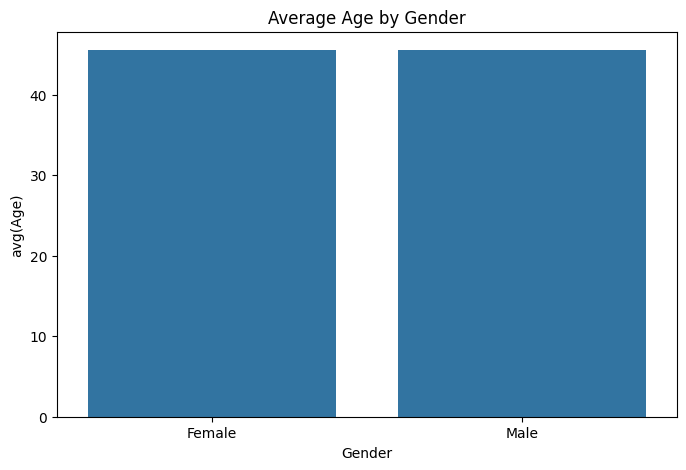

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = airline.groupBy("Gender").avg("Age").toPandas()

plt.figure(figsize=(8,5))
sns.barplot(data=grouped, x="Gender", y="avg(Age)")
plt.title("Average Age by Gender")
plt.show()


# **2.2 LINE PLOT — Flight Distance Trend**

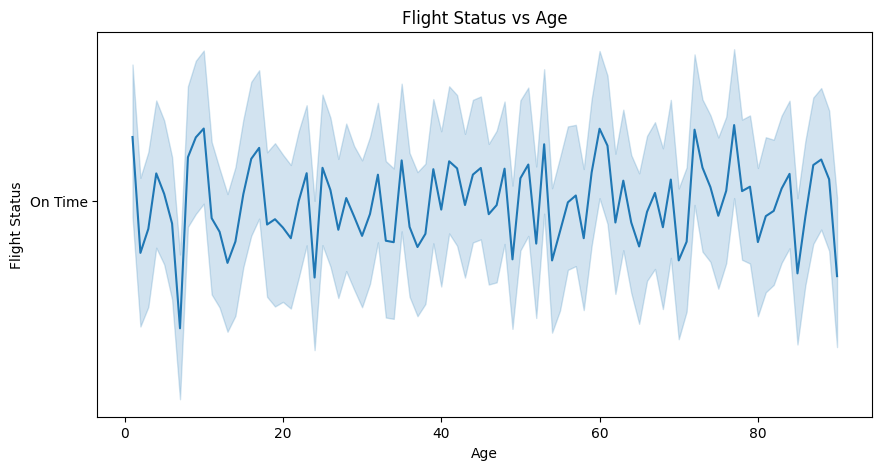

In [ ]:
pdf2 = airline.select("Age", "Flight Status") \
              .orderBy("Age") \
              .toPandas()

plt.figure(figsize=(10,5))
sns.lineplot(data=pdf2, x="Age", y="Flight Status")
plt.title("Flight Status vs Age")
plt.show()


# **2.3 HEATMAP — Correlation of Numeric Columns**

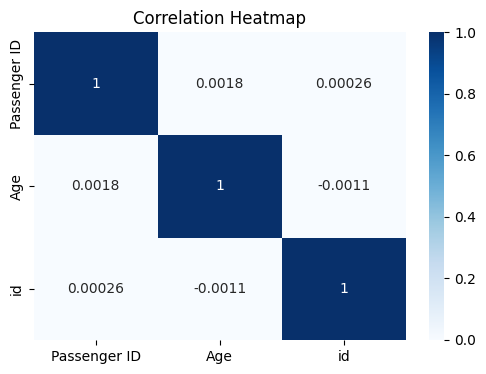

In [ ]:
numeric_df = airline.select("Passenger ID", "Age", "id").toPandas()

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


# **WEEK 9–10**

# **1. Acquire Data From a Public API → Save CSV & JSON**

In [ ]:
import requests
import pandas as pd

url = "https://jsonplaceholder.typicode.com/posts"
r = requests.get(url)
data = r.json()

# Save JSON
import json
with open("api_data.json", "w") as f:
    json.dump(data, f)

# Save CSV
df_api = pd.DataFrame(data)
df_api.to_csv("api_data.csv", index=False)

df_api.head()


,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


# **2. Web Scraping with BeautifulSoup**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://quotes.toscrape.com/"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")

quotes = []
authors = []

for q in soup.find_all("div", class_="quote"):
    quotes.append(q.find("span", class_="text").text)
    authors.append(q.find("small", class_="author").text)

df_scraped = pd.DataFrame({"quote": quotes, "author": authors})
df_scraped.to_csv("scraped_data.csv", index=False)

df_scraped.head()


,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


# **3. Integrate API + Web Scraped Data in PySpar**

In [ ]:
spark_api = spark.createDataFrame(df_api)
spark_scraped = spark.createDataFrame(df_scraped)

spark_api.show(5)
spark_scraped.show(5)


+------+---+--------------------+--------------------+
|userId| id|               title|                body|
+------+---+--------------------+--------------------+
|     1|  1|sunt aut facere r...|quia et suscipit\...|
|     1|  2|        qui est esse|est rerum tempore...|
|     1|  3|ea molestias quas...|et iusto sed quo ...|
|     1|  4|eum et est occaecati|ullam et saepe re...|
|     1|  5|  nesciunt quas odio|repudiandae venia...|
+------+---+--------------------+--------------------+
only showing top 5 rows

+--------------------+---------------+
|               quote|         author|
+--------------------+---------------+
|“The world as we ...|Albert Einstein|
|“It is our choice...|   J.K. Rowling|
|“There are only t...|Albert Einstein|
|“The person, be i...|    Jane Austen|
|“Imperfection is ...| Marilyn Monroe|
+--------------------+---------------+
only showing top 5 rows



# **4. Basic PySpark Transformations (remaining)**

In [ ]:
spark_api.select("id", "title").filter(spark_api.id < 5).show()


+---+--------------------+
| id|               title|
+---+--------------------+
|  1|sunt aut facere r...|
|  2|        qui est esse|
|  3|ea molestias quas...|
|  4|eum et est occaecati|
+---+--------------------+



# **5. Feature Scaling (Min-Max + StandardScaler)**

**`Min-Max Scaling`**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_vals = scaler.fit_transform(df_api[["id"]])

df_api["id_minmax"] = scaled_vals


**`Standardization`**

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaled_std = std.fit_transform(df_api[["id"]])

df_api["id_standard"] = scaled_std


# **6. Feature Selection**

**`Correlation Analysis`**

In [ ]:
df_api[['userId', 'id', 'id_minmax', 'id_standard']].corr()

,userId,id,id_minmax,id_standard
userId,1.000000,0.995037,0.995037,0.995037
id,0.995037,1.000000,1.000000,1.000000
id_minmax,0.995037,1.000000,1.000000,1.000000
id_standard,0.995037,1.000000,1.000000,1.000000


**`RFE (Recursive Feature Elimination)`**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') # Specify solver to avoid warning
rfe = RFE(model, n_features_to_select=3)

# Create a dummy binary target variable for demonstration
# For example, classify based on userId being above a certain threshold
y_target = (df_api['userId'] > 5).astype(int)

rfe.fit(df_api.select_dtypes("number"), y_target)

rfe.support_

array([ True,  True, False,  True])

**`PCA (Principal Component Analysis)`**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_api.select_dtypes("number"))

pca_fit[:5]


array([[-4.97346055e+01,  3.99514032e-01],
       [-4.87388182e+01,  3.00975804e-01],
       [-4.77430309e+01,  2.02437577e-01],
       [-4.67472436e+01,  1.03899349e-01],
       [-4.57514562e+01,  5.36112075e-03]])

# **7. Hyperparameter Tuning (Remaining step)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X = df_api[["id"]]     # sample numeric feature
y = (df_api["id"] % 2) # dummy target

model = RandomForestClassifier()

params = {
    "n_estimators":[50,100,150],
    "max_depth":[3,5,10],
    "min_samples_split":[2,4,6]
}

search = RandomizedSearchCV(model, params, cv=3, n_iter=5)
search.fit(X,y)

best_model = search.best_estimator_
best_model


RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=50)

# **8. Handle Imbalanced Data with SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_api[["id_standard"]]
y = (df_api["id"] % 5 == 0).astype(int)   # artificial imbalance

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)


# **9. Train Models Before/After SMOTE + Compare Metrics**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

print("Before SMOTE:")
print(classification_report(y_test, pred1))

# After SMOTE
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, test_size=0.3)
model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)
pred2 = model2.predict(X_test2)

print("After SMOTE:")
print(classification_report(y_test2, pred2))


Before SMOTE:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.00      0.00      0.00         5

    accuracy                           0.73        30
   macro avg       0.41      0.44      0.42        30
weighted avg       0.68      0.73      0.71        30

After SMOTE:
              precision    recall  f1-score   support

           0       0.22      0.26      0.24        19
           1       0.44      0.38      0.41        29

    accuracy                           0.33        48
   macro avg       0.33      0.32      0.32        48
weighted avg       0.35      0.33      0.34        48



# **10. Train Multiple Models & Compare Performance (remaining)**

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

models = {
    "RF": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGB": XGBClassifier(eval_metric="logloss")
}

results = []

for name, m in models.items():
    m.fit(X_train2, y_train2)
    pred = m.predict(X_test2)
    p, r, f1, _ = precision_recall_fscore_support(y_test2, pred, average='weighted', zero_division=0)
    results.append({"Model": name, "Precision": p, "Recall": r, "F1-Score": f1})
    print(name)
    print(classification_report(y_test2, pred))

df_results = pd.DataFrame(results)

RF
              precision    recall  f1-score   support

           0       0.22      0.26      0.24        19
           1       0.44      0.38      0.41        29

    accuracy                           0.33        48
   macro avg       0.33      0.32      0.32        48
weighted avg       0.35      0.33      0.34        48

SVM
              precision    recall  f1-score   support

           0       0.32      0.58      0.42        19
           1       0.43      0.21      0.28        29

    accuracy                           0.35        48
   macro avg       0.38      0.39      0.35        48
weighted avg       0.39      0.35      0.33        48

XGB
              precision    recall  f1-score   support

           0       0.27      0.32      0.29        19
           1       0.50      0.45      0.47        29

    accuracy                           0.40        48
   macro avg       0.39      0.38      0.38        48
weighted avg       0.41      0.40      0.40        48



# **Model Performance Comparison**

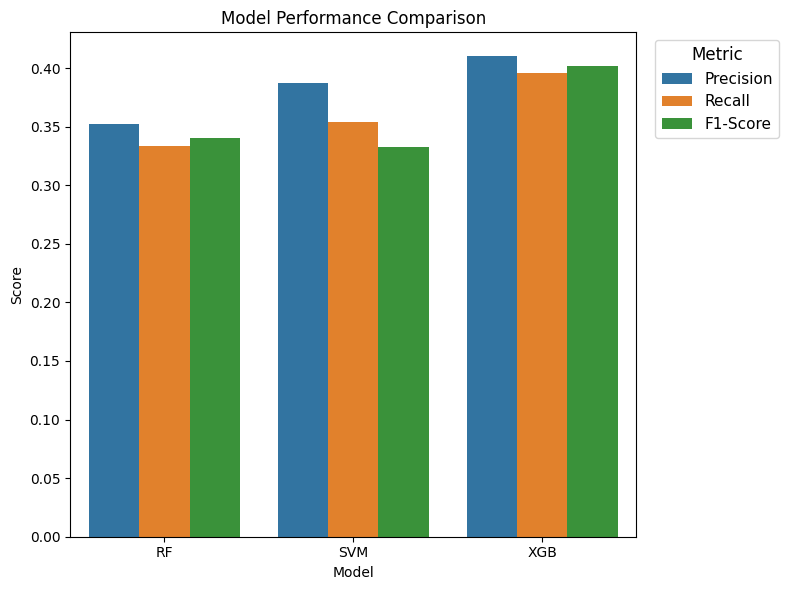

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")

# Legend outside top-right
plt.legend(
    title="Metric",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),   # graph ke bahir right side
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.show()
